### Carlos Magallanes-Aranda
Code to check the probability of loosing instantly

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [250]:
# for test in easy mode, length_deck = 24
# for test in hard mode, length_deck = 8

# Create variables for the game

length_deck = 24
cards_deck = np.zeros(length_deck)
cards_up = np.zeros(7)
used = np.zeros(7+length_deck)

# 0 = black, 1 = red
color_up = [0,0,0,0,0,0,0]

# Amount of tests
tests = np.logspace(6,7,num=10)

# Variables to check montecarlo method
Games_lost = np.zeros(len(tests),dtype=int)
percentages = np.zeros(len(tests))
tests

array([ 1000000.        ,  1291549.66501488,  1668100.53720006,
        2154434.69003188,  2782559.40220713,  3593813.66380463,
        4641588.83361278,  5994842.50318941,  7742636.82681128,
       10000000.        ])

In [251]:
def show(cards_up,cards_deck):
      # array that shows cards
      #cards = ("KB1","QB1","JB1","10B1","9B1","8B1","7B1","6B1","5B1","4B1","3B1","2B1","AB1",
      #            "KB2","QB2","JB2","10B2","9B2","8B2","7B2","6B2","5B2","4B2","3B2","2B2","AB2",
      #            "KW1","QW1","JW1","10W1","9W1","8W1","7W1","6W1","5W1","4W1","3W1","2W1","AW1",
      #            "KW2","QW2","JW2","10W2","9W2","8W2","7W2","6W2","5W2","4W2","3W2","2W2","AW2")

      cards = ("KB","QB","JB","10B","9B","8B","7B","6B","5B","4B","3B","2B","AB",
            "KB","QB","JB","10B","9B","8B","7B","6B","5B","4B","3B","2B","AB",
            "KW","QW","JW","10W","9W","8W","7W","6W","5W","4W","3W","2W","AW",
            "KW","QW","JW","10W","9W","8W","7W","6W","5W","4W","3W","2W","AW",)
      for i in range(len(cards_up)):
            print(cards[cards_up[i]],end=" ")
      print("")
      for i in range(len(cards_deck)):
            print(cards[cards_deck[i]],end=" ")

In [252]:
def play(counter,length_deck,cards_deck,cards_up,used,used_shape,color_up):
    # Setup
    # Random setup for all the tests
    used = np.random.choice(52,used_shape , replace=False)

    # test for any ace (possible move)
    ace = np.isin(used,[12,25,38,51])
    if ace.any() == True:
        counter += 1
        return counter

    # Split into arrays
    cards_deck = used[:length_deck]
    cards_up = used[length_deck:]

    # Save the colors for the cards up
    for i in range(7):
        if cards_up[i] > 25:
            color_up[i] = 1

    for i in range(length_deck):

        # Type of card (independently from the color)
        card_rem = cards_deck[i]%13   

        if cards_deck[i] > 25:
            color_card = 1
        else:
            color_card = 0

        # Check if the card is a King
        # Doesn't connect if it is a King
        if card_rem != 0:
            for ii in range(7):
                #Check is the colors mismatch
                if color_card != color_up[ii]:
                    # Check if they can be joined
                    temp = [0,13,26,39] + np.ones(4)*(card_rem-1)
                    join = np.isin(cards_up[ii],temp)
                    if join.any() == True:
                        counter += 1
                        return counter
    # Function to show the deck of a lost game
    #show(cards_up,cards_deck)
    return(counter)


In [253]:
def test(tests,Games_lost):
    for ii in range(len(tests)):
        counter = 0
        print(str(ii+1) + "/" + str(len(tests)))
        for i in tqdm(range(int(tests[ii]))):
            counter = play(counter,length_deck,cards_deck,cards_up,used,used.shape,color_up)
        Games_lost[ii] = tests[ii]-counter
    return(Games_lost)
test(tests,Games_lost)

1/10


100%|██████████| 1000000/1000000 [00:26<00:00, 37934.72it/s]


2/10


100%|██████████| 1291549/1291549 [00:34<00:00, 37471.18it/s]


3/10


100%|██████████| 1668100/1668100 [00:44<00:00, 37471.07it/s]


4/10


100%|██████████| 2154434/2154434 [00:57<00:00, 37307.52it/s]


5/10


100%|██████████| 2782559/2782559 [01:14<00:00, 37454.67it/s]


6/10


100%|██████████| 3593813/3593813 [01:45<00:00, 33920.70it/s]


7/10


100%|██████████| 4641588/4641588 [02:16<00:00, 33910.20it/s]


8/10


100%|██████████| 5994842/5994842 [03:43<00:00, 26869.38it/s]


9/10


100%|██████████| 7742636/7742636 [11:12<00:00, 11512.91it/s]


10/10


100%|██████████| 10000000/10000000 [1:07:11<00:00, 2480.69it/s]  


array([ 16,  18,  19,  28,  39,  48,  69,  75, 102, 147])

<function matplotlib.pyplot.show(close=None, block=None)>

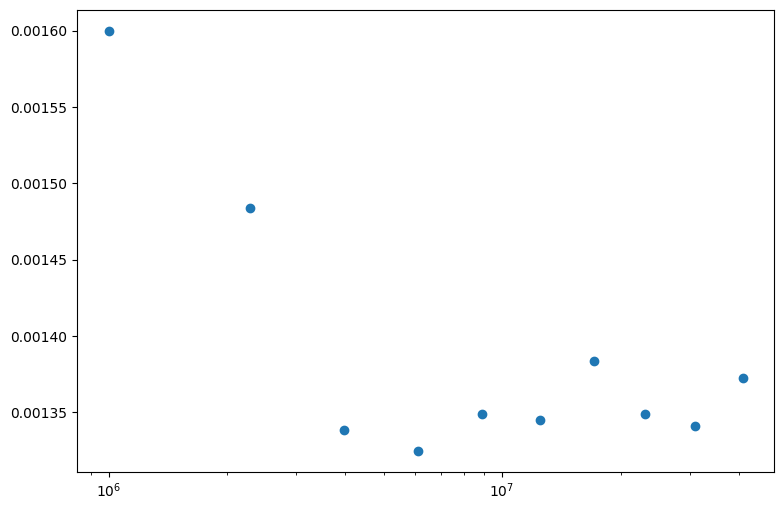

In [254]:
total_tests = np.zeros(len(tests),dtype=int)
total_losts = np.zeros(len(tests),dtype=int)
for i in range(len(tests)):
    if i > 0:
        c = 2
        total_tests[i] = total_tests[i-1] + tests[i]
        total_losts[i] = total_losts[i-1] + Games_lost[i]
    else:
        total_losts[i] = Games_lost[i]
        total_tests[i] = tests[i]
percentages = total_losts/total_tests*100

fig,ax = plt.subplots(figsize = (9, 6))
ax.scatter(total_tests,percentages)
ax.set_xscale("log")

plt.show